In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
#Layers, Datasets to Download the mnist data, utilities to covert Y t one hot encoded data

In [ ]:
#Importing Layers for building ANN
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

One-hot encoding is a technique used to represent categorical data (such as class labels) as numerical data in machine learning models.

In one-hot encoding, each categorical value is converted into a binary vector of zeros and ones. The length of the binary vector is equal to the number of possible categorical values. Each position in the vector corresponds to a possible categorical value, and it is set to 1 if the original value matches that position, and 0 otherwise.

For example, suppose you have three categorical values: "red", "green", and "blue". To one-hot encode these values, you would create a binary vector of length 3 for each value, where the vector has a 1 in the position corresponding to the color, and 0s elsewhere. For instance, "red" would be represented as [1, 0, 0], "green" as [0, 1, 0], and "blue" as [0, 0, 1].

In [ ]:
# Print the shape of Y
print("Shape of Y (Training set): ", y_train.shape)
print("Shape of Y (Test set): ", y_test.shape)

# Print the first 10 Y values
print("First 10 Y values (Training set): ", y_train[:10])
print("First 10 Y values (Test set): ", y_test[:10])

Shape of Y (Training set):  (60000,)
Shape of Y (Test set):  (10000,)
First 10 Y values (Training set):  [5 0 4 1 9 2 1 3 1 4]
First 10 Y values (Test set):  [7 2 1 0 4 1 4 9 5 9]


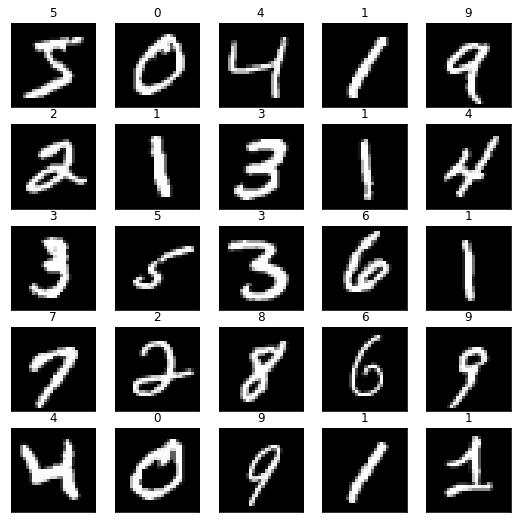

In [ ]:
#Plot samples of images  in Matplot Lib
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Plot the first 9 images in the training set
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(9,9))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(y_train[i])
plt.show()

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Print the first 10 Y values
print("First 10 Y values (Training set): ", y_train[:10])
print("First 10 Y values (Test set): ", y_test[:10])

First 10 Y values (Training set):  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
First 10 Y values (Test set):  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# Flatten the 28x28 images into a 784-dimensional vector
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Build a neural network with one hidden layer
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(10, activation='softmax'))

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Fitting the above model using Fit()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 4.3400 - accuracy: 0.8677 - val_loss: 0.9281 - val_accuracy: 0.8925
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6018 - accuracy: 0.9066 - val_loss: 0.5585 - val_accuracy: 0.9138
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3413 - accuracy: 0.9279 - val_loss: 0.4686 - val_accuracy: 0.9251
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2502 - accuracy: 0.9434 - val_loss: 0.4008 - val_accuracy: 0.9333
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1946 - accuracy: 0.9527 - val_loss: 0.3763 - val_accuracy: 0.9363
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1648 - accuracy: 0.9564 - val_loss: 0.3368 - val_accuracy: 0.9389
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1562 - accuracy: 0.9598 - val_loss: 0.3524 - val_accuracy: 0.9375
Epoch 

In [ ]:
#predict the test data using predict() fxn
y_pred = model.predict(X_test)


313/313 [==============================] - 1s 3ms/step


In [ ]:
print(y_pred)

[[0.00000000e+00 0.00000000e+00 2.11071233e-28 ... 9.99999940e-01
  4.17803168e-37 1.59104045e-18]
 [0.00000000e+00 8.73060291e-10 9.99999940e-01 ... 0.00000000e+00
  1.72602011e-15 0.00000000e+00]
 [1.55368739e-24 9.99999940e-01 2.51056231e-20 ... 1.36471820e-10
  9.04990118e-17 3.50387073e-22]
 ...
 [0.00000000e+00 2.05649449e-33 0.00000000e+00 ... 2.98707364e-10
  3.03205191e-26 3.42400619e-09]
 [3.59311409e-17 2.08250330e-25 9.17226561e-23 ... 1.12155079e-25
  1.94102904e-06 7.35765013e-23]
 [8.39016204e-15 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.27450930e-15 1.06538545e-20]]


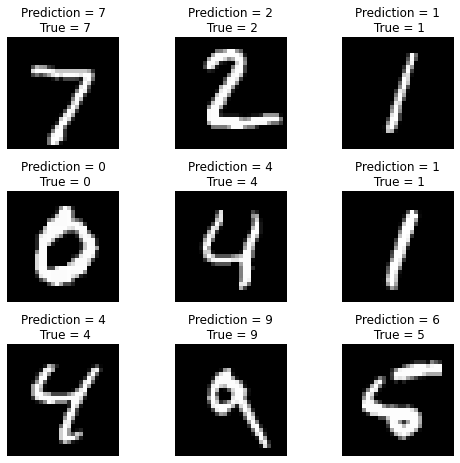

In [ ]:

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Plot a few samples of the test data along with their predicted labels
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in np.arange(0, 9):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray)
    axes[i].set_title("Prediction = {}\n True = {}".format(y_pred_labels[i], np.argmax(y_test[i])))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=0.5)


In [ ]:
#Time Complexity of the code
import time

start_time = time.time()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

end_time = time.time()

# Compute the time complexity of the training loop
N = X_train.shape[0]
E = 10
B = 128
C = history.params['epochs'] * N * (model.count_params() + 1)

time_complexity = C / (end_time - start_time)

print("Time complexity: O({:.2f})".format(time_complexity))


Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1257 - accuracy: 0.9673 - val_loss: 0.2813 - val_accuracy: 0.9482
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1154 - accuracy: 0.9698 - val_loss: 0.2874 - val_accuracy: 0.9556
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1020 - accuracy: 0.9734 - val_loss: 0.2599 - val_accuracy: 0.9581
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0989 - accuracy: 0.9737 - val_loss: 0.3020 - val_accuracy: 0.9510
Epoch 5/10
469/469 [==============================] - 4s 10ms/step - loss: 0.1052 - accuracy: 0.9726 - val_loss: 0.2598 - val_accuracy: 0.9597
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1006 - accuracy: 0.9732 - val_loss: 0.2925 - val_accuracy: 0.9565
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1002 - accuracy: 0.9739 - val_loss: 0.2834 - val_accuracy: 0.9580
Epoch